In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
import numpy.ma as ma
from scipy.integrate import simps

In [93]:
def gauss(x, sigma, mu):
    return (1 / (sigma*np.sqrt(2*np.pi)) ) * np.exp((-1/2)*((x-mu)/sigma)**2)

In [18]:
def y(N,x):
    return 5*N*(0.2969*(x**(1/2)) - 0.1260*x - 0.3516*(x**2) + 0.2843*(x**3) - 0.1015*(x**4))

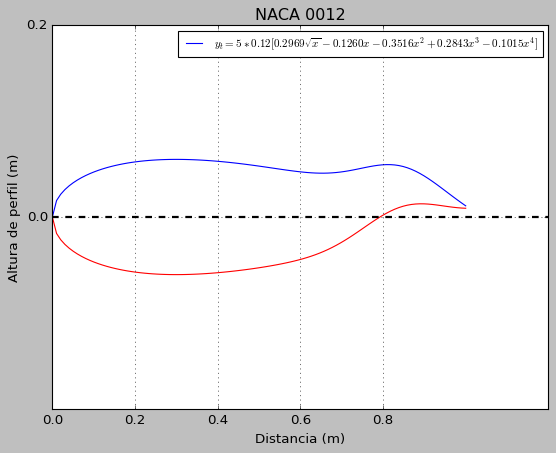

In [106]:
plt.style.use('classic')
x = np.linspace(0,1,100)
N = 0.12
f = y(N,x)
a = 0.008
mu = 0.85
sigma = 0.1
offset = -0.00
plt.plot(x, y(N,x)+a*gauss(x,sigma,mu)+offset, color='blue')
plt.plot(x, -y(N,x)+a*gauss(x,sigma,mu)+offset, color='red')
plt.xticks(np.arange(0, 1, step=0.2))
plt.yticks(np.arange(0, 1, step=0.2))
plt.ylim([-0.2,0.2])
plt.xlim([0,1.2])
plt.legend([r'$y_{t} = 5*0.12 [0.2969\sqrt{x} - 0.1260x-0.3516x^{2}+0.2843x^{3}-0.1015x^{4}]$'], fontsize="10")
plt.title('NACA 0012')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=2, color = 'k', linestyle='dashed')
plt.ylabel('Altura de perfil (m)')
plt.xlabel('Distancia (m)')
plt.grid()
plt.savefig('NACA0012')
plt.show()

In [88]:
import math
def fa(r,v,n):
    Fa=6*math.pi*r*v*n
    if v==0 or r==0:
        print ("No existe la fuerza")
    else:
        print ("El valor de la fuerza de arrastre es", Fa , "Newton")
        print ("") #vacio
        print ("1- Realizar grafica, para ver la grafica debera finalizar el programa")
        print ("2- No realizar la grafica")
        g= float(input())
        if g==1:
            v = np.linspace(0, 40, 2)
            fig, ax = plt.subplots()
            ax.plot(v, 6*math.pi*r*v*n)
            ax.set_xlabel('$Velocidad$', fontsize=12)
            ax.set_ylabel('Fuerza de arrastre', fontsize=12)
            ax.set_title("Fuerza con relacion a la velocidad", fontsize=16);

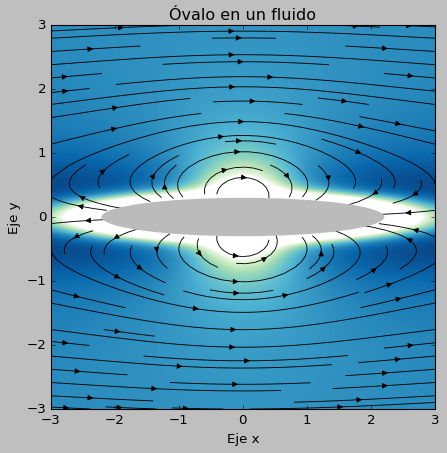

In [103]:
# Variables
a = 2.21  # Semieje mayor del óvalo
b = 0.3  # Semieje menor del óvalo
U = 63.3333
x = np.linspace(-3, 3, 151)
y = np.linspace(-3, 3, 151)

xx, yy = np.meshgrid(x, y)

# Calcula el radio del óvalo
rr = np.sqrt((xx / a) ** 2 + (yy / b) ** 2)

# Calcula el ángulo polar
tt = np.arctan2(yy, xx)

# Enmascaramos el centro para evitar singularidades
rr = ma.masked_less_equal(rr, 0.9)

# Función potencial
phi = U * (rr + a ** 2 / rr) * np.cos(tt)

# Función de corriente
psi = U * (rr - a ** 2 / rr) * np.sin(tt)

# Coeficiente de presiones
c_p = 2 * a ** 2 / rr ** 2 * np.cos(2 * tt) - a ** 4 / rr ** 4

# Velocidad (polares)
v_r = U * (1 - a ** 2 / rr ** 2) * np.cos(tt)
v_theta = -U * (1 + a ** 2 / rr ** 2) * np.sin(tt)

# Velocidad (rectangulares)
v_x = v_r * np.cos(tt) - v_theta * np.sin(tt)
v_y = v_r * np.sin(tt) + v_theta * np.cos(tt)

# Creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111)

# Óvalo
ellipse = Ellipse((0, 0), 2 * a, 2 * b, color='#bbbbbb', linewidth=0, zorder=10)
ax.add_patch(ellipse)

# Líneas de corriente
ax.streamplot(xx, yy, v_x, v_y, linewidth=0.8, color='k')

# Coeficiente de presiones
cs = ax.contourf(xx, yy, c_p, np.linspace(-3, 1, 1000), cmap=cm.GnBu)

# Etiquetas
ax.set_xlabel('Eje x')
ax.set_ylabel('Eje y')
ax.set_title("Óvalo en un fluido")
ax.set_aspect(1)

# Figura
fig.savefig('lineas-flujo-cessna.png', dpi=150)

# Muestra el gráfico
plt.show()


In [21]:
def phi(U, x, z, q, x0):
    return U*x + (q/2*np.pi)*np.log(np.sqrt((x+x0)**2 + z**2))-(q/2*np.pi)*np.log(np.sqrt((x-x0)**2 + z**2))

In [96]:
x = np.linspace(0,1.036,100) # c
U = 63.3 # m/s
N = 0.12
z = y(N, x)
q = 15
x0 = 0.4
v = phi(U, x, z, q, x0)


In [97]:
v

array([ 0.        ,  1.89319656,  3.78378658,  5.67380978,  7.56519995,
        9.45984614, 11.35962304, 13.26641348, 15.18212806, 17.1087236 ,
       19.04822142, 21.00272595, 22.97444423, 24.96570668, 26.97898929,
       29.01693781, 31.0823939 , 33.17842342, 35.30834685, 37.47577123,
       39.68462273, 41.9391776 , 44.24408793, 46.60439542, 49.02552173,
       51.51321582, 54.07342508, 56.7120339 , 59.43437518, 62.2443563 ,
       65.14293929, 68.12556071, 71.1778779 , 74.26907112, 77.34215245,
       80.30220682, 83.00772327, 85.27749251, 86.92898985, 87.84654469,
       88.03841567, 87.63244042, 86.81446317, 85.76239786, 84.6122179 ,
       83.45384854, 82.34071645, 81.30141471, 80.34903197, 79.48751361,
       78.7156736 , 78.02961803, 77.42416884, 76.89368046, 76.43249475,
       76.03518317, 75.69666503, 75.41225464, 75.17766846, 74.98901073,
       74.84274832, 74.73568098, 74.66491057, 74.62781131, 74.62200178,
       74.64531942, 74.69579738, 74.77164392, 74.87122387, 74.99

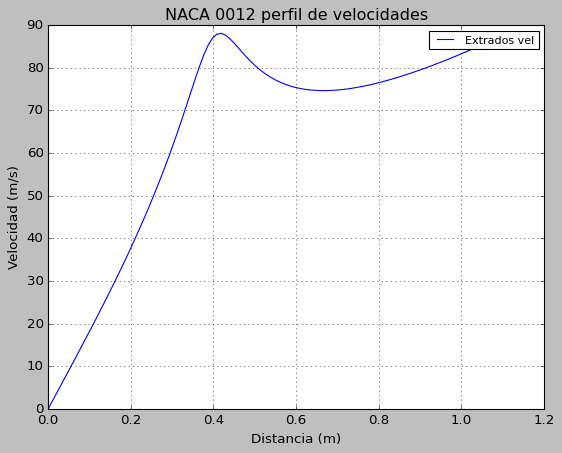

In [102]:
plt.style.use('classic')
plt.plot(x,v)
plt.legend(['Extrados vel'], fontsize="10")
plt.title('NACA 0012 perfil de velocidades')
plt.ylabel('Velocidad (m/s)')
plt.xlabel('Distancia (m)')
plt.savefig('Perfil de velocidades')
plt.grid()
fig.savefig('velocidades.png', dpi=150)

In [99]:
circulacion = np.trapz(v, x)*2
circulacion

132.6868108357476

In [104]:
L = 1.03*63.3*circulacion
L

8651.047379679907

In [101]:
L/9.8

882.7599367020313

In [128]:
phi.mean()

8.530433064904707e-15